# UTKFace Exploratory Data Analysis

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.models import load_model
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from collections import Counter
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.utils import shuffle

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

%matplotlib inline

from PIL import Image
import shutil

### variables 

In [2]:
BASE_DIR = '../input/utkface-new/UTKFace/'

### Define methods map direct age to classes

In [3]:
def age_to_class( age ):
  age_class = None
  # 0 (0-20)
  if 0 <= age <= 20:
    age_class = 0
  # 1 (20-40)
  if 20 < age <= 40:
    age_class = 1
  # 2 (40-60)
  if 40 < age <= 60:
    age_class = 2
  # 3 (40-60)
  if 60 < age <= 80:
    age_class = 3
  # 3 (80+)
  if age > 80:
    age_class = 4
  return age_class

# map age classes for age gaps
age_dict = {0:'0-20', 1:'20-40',2:'40-60', 3:'60-80', 4:'80+'}

def decode_age_label(age_id):
  return age_dict[int(age_id)]

In [4]:
gender_dict = {0:'Male', 1:'Female'}

### Read input dataset

In [5]:
# read labels of image age, gender
image_paths = []
age_labels = []
gender_labels =[]
age_class = []

for filename in tqdm(os.listdir(BASE_DIR)):
  #read image path
  image_path = os.path.join(BASE_DIR, filename)
  #split filename to extract labels
  temp= filename.split('_')
  age = int(temp[0])
  gender = int(temp[1])
  image_paths.append(image_path)
  age_labels.append(age)
  gender_labels.append(gender)
  age_class.append(age_to_class(age))

# extract name of file 
names = []
for path in image_paths:
  temp = path.split('/')
  names.append(temp[4])

#convert to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'], df['age_class'], df['name'] = image_paths, age_labels, gender_labels, age_class, names
df.head()
df

# get and print the number of images in dataframe
age_verbose = [age_dict[int(age)] for age in df['age_class']]

print(Counter(age_verbose))



  0%|          | 0/23708 [00:00<?, ?it/s]

Counter({'20-40': 12123, '0-20': 4877, '40-60': 4311, '60-80': 1857, '80+': 540})



## Exploratory Data Analysis

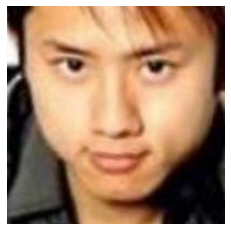

In [6]:
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img)

<AxesSubplot:xlabel='age', ylabel='Density'>

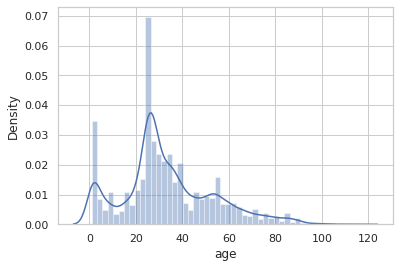

In [7]:
sns.set_theme(style="whitegrid")
sns.distplot(df['age'])

[[Text(0, 0, '0-20'),
  Text(1, 0, '20-40'),
  Text(2, 0, '40-60'),
  Text(3, 0, '60-80'),
  Text(4, 0, '80+')]]

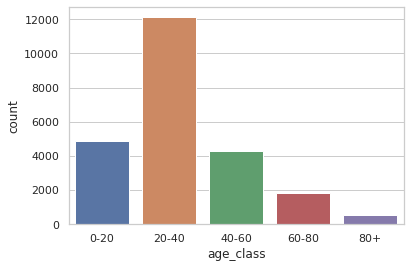

In [8]:
class_plot = sns.countplot(df['age_class'])
class_plot.set(xticklabels = (['0-20', '20-40', '40-60', '60-80', '80+']))

<AxesSubplot:xlabel='gender', ylabel='count'>

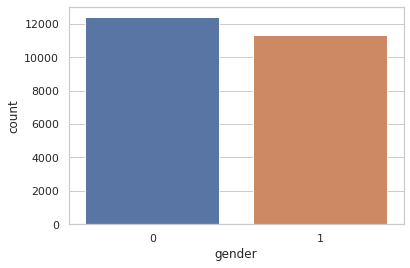

In [9]:
sns.countplot(df['gender'])

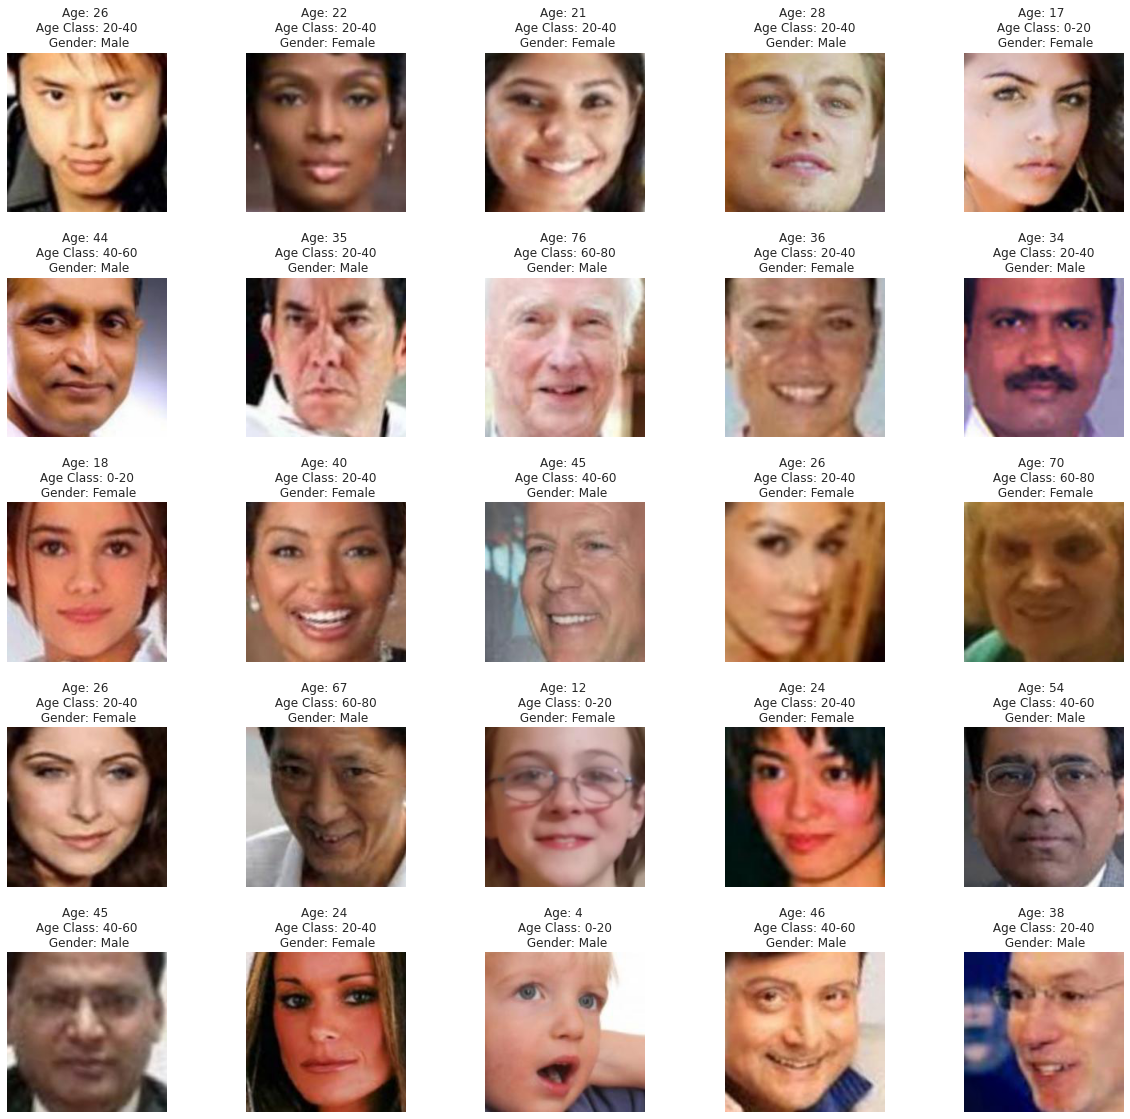

In [10]:
plt.figure(figsize=(20,20))
files = df.iloc[0:25]

for index, file, age, gender, age_class, name in files.itertuples():
  plt.subplot(5, 5, index+1)
  img = tf.keras.utils.load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title(f"Age: {age} \n Age Class: {decode_age_label(age_class)} \n Gender: {gender_dict[gender]}", fontsize=12)
  plt.axis('off')
  plt.subplots_adjust(wspace=0.5)

### Shuffle dataset

In [11]:
# shuffle dataset 
df = shuffle(df)

In [12]:
# check dataframe
df 

,image,age,gender,age_class,name
5467,../input/utkface-new/UTKFace/31_1_3_2017010423...,31,1,1,31_1_3_20170104234902482.jpg.chip.jpg
21229,../input/utkface-new/UTKFace/41_0_1_2017011716...,41,0,2,41_0_1_20170117164137053.jpg.chip.jpg
20006,../input/utkface-new/UTKFace/60_1_0_2017011014...,60,1,2,60_1_0_20170110140637026.jpg.chip.jpg
14571,../input/utkface-new/UTKFace/40_0_0_2017011714...,40,0,1,40_0_0_20170117140006196.jpg.chip.jpg
23135,../input/utkface-new/UTKFace/35_0_0_2017011715...,35,0,1,35_0_0_20170117155112202.jpg.chip.jpg
...,...,...,...,...,...
20163,../input/utkface-new/UTKFace/24_0_2_2017011916...,24,0,1,24_0_2_20170119165656526.jpg.chip.jpg
10862,../input/utkface-new/UTKFace/35_1_3_2017011715...,35,1,1,35_1_3_20170117154659552.jpg.chip.jpg
12069,../input/utkface-new/UTKFace/20_1_2_2017011618...,20,1,0,20_1_2_20170116182714846.jpg.chip.jpg
12403,../input/utkface-new/UTKFace/24_0_1_2017011600...,24,0,1,24_0_1_20170116002302626.jpg.chip.jpg
